<a href="https://colab.research.google.com/github/CapZondar/Python-first-steps/blob/main/Insurance_charges_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')
import matplotlib as mpl
import matplotlib.ticker as tkr

In [262]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo - Data Science/Week 1 - Machine Learning/insurance.csv')

display(df.info(),
        df.isnull().sum(),
        'Includes duplicate data:',df.duplicated().any(),
        df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

'Includes duplicate data:'

True

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [264]:
#since we see that we have duplicate data, we want to inspect further
display(df[df.duplicated(keep = False)])
df = df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


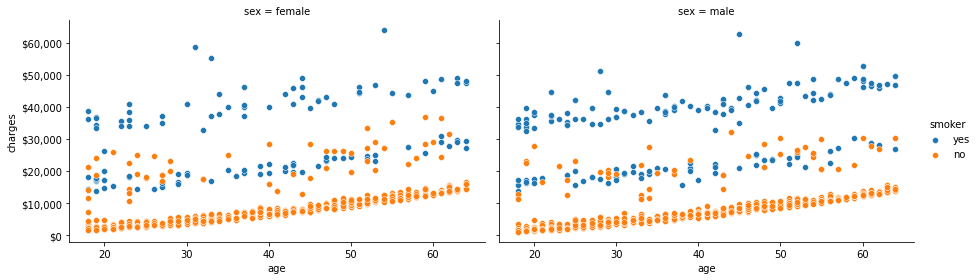

In [265]:
#visualizing the data to clearly see which factors affect the charges for insurance

grid = sns.FacetGrid(data=df,
              col='sex',
              hue='smoker',
              height=4,
              aspect=1.6)

grid.map_dataframe(sns.scatterplot,
                   'age',
                   'charges')

for ax in grid.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'${y:,.0f}'))

grid.add_legend()

plt.show()

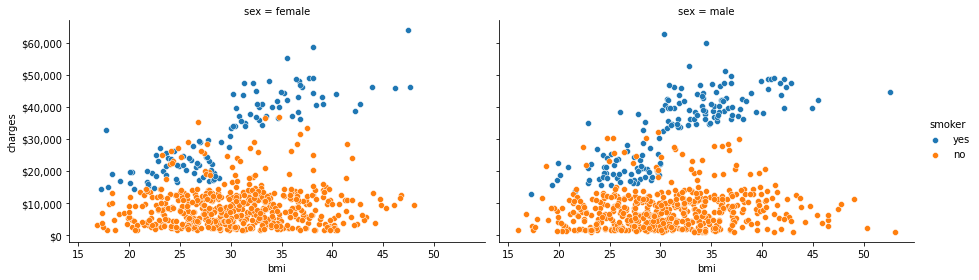

In [266]:
grid = sns.FacetGrid(data=df,
              col='sex',
              hue='smoker',
              height=4,
              aspect=1.6)

grid.map_dataframe(sns.scatterplot,
                   'bmi',
                   'charges')

for ax in grid.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'${y:,.0f}'))

grid.add_legend()

plt.show()

### We can immediately see that as the age gets higher, the charges goes higher as well.

#### The charges are even higher if the individual is a smoker.

In [267]:
#starting with the validation split 

X = df.drop('charges',axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train

,age,sex,bmi,children,smoker,region
763,27,male,26.03,0,no,northeast
1079,63,male,33.66,3,no,southeast
178,46,female,28.90,2,no,southwest
287,63,female,26.22,0,no,northwest
1290,38,female,19.95,2,no,northeast
...,...,...,...,...,...,...
1096,51,female,34.96,2,yes,northeast
1131,27,male,45.90,2,no,southwest
1295,20,male,22.00,1,no,southwest
861,38,female,28.00,3,no,southwest


In [268]:
#instantiating transformers and imputers
ohe = OneHotEncoder(sparse=False,
                    handle_unknown='ignore')

mean_impute = SimpleImputer(strategy='mean')

scaler = StandardScaler()

In [269]:
#segregating columns based on datatype

num = ['age','bmi']
nom = ['sex','children','smoker','region']



In [270]:
#starting to build pipelines

num_pipe = make_pipeline(mean_impute,scaler)
nom_pipe = make_pipeline(ohe)

In [271]:
#declaring variable for linear regression
reg = LinearRegression()

In [272]:
#iniitiating tuples

num_tuple = (num_pipe, num)
nom_tuple = (nom_pipe,nom)

In [273]:
preprocessor = make_column_transformer(num_tuple, nom_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'bmi']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['sex', 'children', 'smoker', 'region'])])

In [274]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'bmi']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['sex', 'children', 'smoker', 'region'])])

In [275]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed

array([[-0.8629477 , -0.76233578,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71517467,  0.50682967,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49772799, -0.28494327,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.36424928, -1.43268136,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.07518809, -0.43464824,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.29003162,  0.87277515,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [276]:
ohe = preprocessor.named_transformers_['pipeline-2']['onehotencoder']
nom_feature_names = ohe.get_feature_names_out()
nom_feature_names

array(['sex_female', 'sex_male', 'children_0', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'], dtype=object)

In [277]:
list1 = list(nom_feature_names)
list1

['sex_female',
 'sex_male',
 'children_0',
 'children_1',
 'children_2',
 'children_3',
 'children_4',
 'children_5',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [278]:
cols = ['age','bmi'] + list1
cols

['age',
 'bmi',
 'sex_female',
 'sex_male',
 'children_0',
 'children_1',
 'children_2',
 'children_3',
 'children_4',
 'children_5',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [279]:
final_df = pd.DataFrame(X_train_processed,
                        columns=cols)

display(final_df,
        final_df.describe().round(2))

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-0.862948,-0.762336,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.715175,0.506830,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.497728,-0.284943,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.715175,-0.730731,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.075188,-1.773676,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.855801,0.723070,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
998,-0.862948,2.542817,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
999,-1.364249,-1.432681,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1000,-0.075188,-0.434648,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1002.00,1002.00,1002.00,1002.00,1002.00,1002.00,1002.00,1002.00,1002.00,1002.00,1002.0,1002.0,1002.00,1002.00,1002.00,1002.00
mean,-0.00,0.00,0.48,0.52,0.42,0.25,0.18,0.11,0.02,0.01,0.8,0.2,0.23,0.25,0.27,0.25
std,1.00,1.00,0.50,0.50,0.49,0.43,0.38,0.32,0.14,0.11,0.4,0.4,0.42,0.43,0.44,0.43
min,-1.51,-2.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,-0.86,-0.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.00,0.00,0.00,0.00
50%,-0.00,-0.07,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.00,0.00,0.00,0.00
75%,0.86,0.66,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.0,0.0,0.00,1.00,1.00,0.75
max,1.79,3.75,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00


In [280]:
reg.fit(X_train_processed,y_train)

LinearRegression()

In [281]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.7321061423675503


In [282]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.7929192770457755
